Census Assignment 2: Basic Text Operations for Analysis
=

Learning Objectives:

- Get familiar with using ElementTree library in Python to traverse an XML document
- Extract informa on from the XML document as raw text
- Perform simple analysis of the text


1.Import Everything
=


In [81]:
import sys
import os
import xml.etree.ElementTree as ET

from nltk import word_tokenize
from pathlib import Path

from nltk import Text
from nltk.corpus import stopwords

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

print(project_root)
fileName = project_root + "./data/Jules_Verne_Twenty_Thousand_Leagues.txt"
trainDir = project_root + "./data/"

tree = ET.parse(fileName)

root = tree.getroot()

print( root.tag )
print( root.attrib )

E:\DigiPenMasterCourse\Semester4_2026\cs592_NLP\cs592-natural-language-processing\Chankasemporn_Ju-ve_CS592_Census2
Book
{}


2.Extract information on from the document
=

- From the document, extract the raw text contained within the '<' Item '>' '</'Item'>'tags
- Store the text in a suitable container object
- Print the text to console one by one by itera ng over the container


In [86]:
# Find the Body element
bodyElement = root.find('Body')

itemList = bodyElement.findall(".//Item")
for item in itemList:
    print( item.tag )
    print( item.attrib )
    print( item.text )

Item
{'id': '0', 'wordCount': '11972'}


The year 1866 was signalised by a remarkable incident, a mysterious and
puzzling phenomenon, which doubtless no one has yet forgotten. Not to
mention rumours which agitated the maritime population and excited the
public mind, even in the interior of continents, seafaring men were
particularly excited. Merchants, common sailors, captains of vessels,
skippers, both of Europe and America, naval officers of all countries,
and the Governments of several states on the two continents, were
deeply interested in the matter.

For some time past, vessels had been met by “an enormous thing,” a long
object, spindle - shaped, occasionally phosphorescent, and infinitely
larger and more rapid in its movements than a whale.

The facts relating to this apparition (entered in various log - books)
agreed in most respects as to the shape of the object or creature in
question, the untiring rapidity of its movements, its surprising power
of locomotion, and the peculia

Analysis of Text
=

NLTK task 1: Find occurrences of “Captain Nemo”
=


In [87]:
from nltk.util import bigrams

tokens = []
uniqueWords = []

for item in itemList:
    tokens = tokens + word_tokenize(item.text)

tokenList = Text(tokens)

count = 0
for w1, w2 in bigrams(tokens):
    if w1 == "Captain" and w2 == "Nemo":
        count += 1

print("Occurrences of 'Captain Nemo':", count)

Occurrences of 'Captain Nemo': 375


NLTK task 2: Find contextual information on for each occurrence
=




In [93]:
Text(tokens).concordance("Nemo")


Displaying 25 of 378 matches:
 , “ I am nothing to you but Captain Nemo ; and you and your companions are no
assengers of the nautilus. ” Captain Nemo called . A steward appeared . The ca
vice , Captain. ” I followed Captain Nemo ; and as soon as I had passed throug
as a table richly laid out . Captain Nemo indicated the place I was to occupy 
 must have a marine origin . Captain Nemo looked at me . I asked him no questi
an as a connoisseur , whilst Captain Nemo enchanted me with his extraordinary 
asters ! There I am free ! ” Captain Nemo suddenly became silent in the midst 
us , I am at your service. ” Captain Nemo rose . I followed him . A double doo
scarcely believe my eyes . “ Captain Nemo , ” said I to my host , who had just
ence , Professor ? ” replied Captain Nemo . “ Did your study in the Museum aff
 of them freely. ” I thanked Captain Nemo , and went up to the shelves of the 
 not only a library , ” said Captain Nemo , “ it is also a smoking - room. ” “
 sparingly. ” At that 

NLTK task 3: Plot the dispersion plot for the query phrase
=


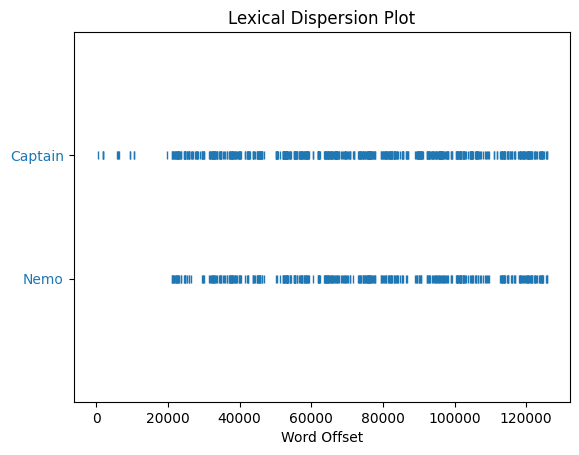

In [91]:
import matplotlib.pyplot as plt

tokenList.dispersion_plot(["Captain", "Nemo"])
plt.show()